In [4]:
import matplotlib.pyplot as plt
import pickle

In [6]:
adu = pickle.load(open("backup/replay_memory.pth","rb"))

In [7]:
len(adu)

50000

In [11]:
len(adu[0])

5

In [57]:
state, action, reward, next_state, done = adu[33]

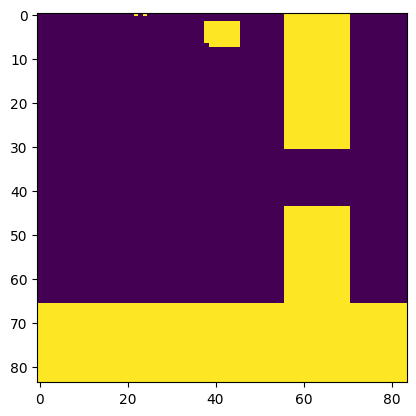

In [58]:
plt.imshow(state[0][[3],:,:].permute(1,2,0))

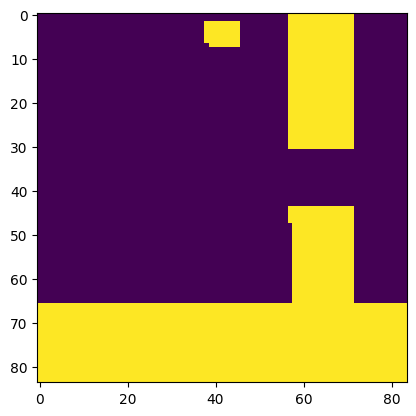

In [64]:
plt.imshow(next_state[0][[0],:,:].permute(1,2,0))